In [1]:
import pandas as pd

In [2]:
!ls data/DL76333/R/section3-dau.csv

data/DL76333/R/section3-dau.csv


In [3]:
dau = pd.read_csv('data/DL76333/R/section3-dau.csv')
dpu = pd.read_csv('data/DL76333/R/section3-dpu.csv')
install = pd.read_csv('data/DL76333/R/section3-install.csv')

In [4]:
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [5]:
dau.columns

Index(['log_date', 'app_name', 'user_id'], dtype='object')

In [6]:
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [7]:
dpu.columns

Index(['log_date', 'app_name', 'user_id', 'payment'], dtype='object')

In [8]:
install.head()

,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


In [9]:
install.columns

Index(['install_date', 'app_name', 'user_id'], dtype='object')

# データ前処理

1. ユーザー情報のデータ（DAU）に利用開始情報（instal）を結合する
2. 上記のデータに、さらに課金情報（DPU）を結合する
3. 非課金ユーザーの課金額にゼロをいれる
4. 月次で集計する
5. 月次データに新規ユーザーか既存ユーザー化の区分を追加する

In [10]:
# 1
# dauとinstallを、user_id, app_nameをkeyにしてmerge
merge_dau_install = pd.merge(dau, install, on=['user_id', 'app_name'])

In [11]:
merge_dau_install.head()

,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-02,game-01,116,2013-04-17
2,2013-06-03,game-01,116,2013-04-17
3,2013-06-04,game-01,116,2013-04-17
4,2013-06-05,game-01,116,2013-04-17


In [12]:
# 2
# dauとinstallをmergeしたDataframeと、dpuを、user_idとapp_nameとlog_dateをkeyにしてleft merge
merge_dau_install__dpu = pd.merge(merge_dau_install, dpu, how='left', on=['log_date', 'user_id', 'app_name'])

In [13]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-02,game-01,116,2013-04-17,NaN
2,2013-06-03,game-01,116,2013-04-17,NaN
3,2013-06-04,game-01,116,2013-04-17,NaN
4,2013-06-05,game-01,116,2013-04-17,NaN


In [14]:
# 3
merge_dau_install__dpu['payment'] = merge_dau_install__dpu['payment'].fillna(0)

In [15]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [16]:
#4
merge_dau_install__dpu['log_date'] = pd.to_datetime(merge_dau_install__dpu['log_date'])

In [17]:
merge_dau_install__dpu['install_date'] = pd.to_datetime(merge_dau_install__dpu['install_date'])

In [18]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [19]:
# 4
merge_dau_install__dpu['log_date'] = merge_dau_install__dpu['log_date'].dt.strftime('%Y%m')
merge_dau_install__dpu['install_date'] = merge_dau_install__dpu['install_date'].dt.strftime('%Y%m')

In [20]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,201306,game-01,116,201304,0.0
1,201306,game-01,116,201304,0.0
2,201306,game-01,116,201304,0.0
3,201306,game-01,116,201304,0.0
4,201306,game-01,116,201304,0.0


In [21]:
# 月毎にユーザー別にグルーピング
# as_index=Falseを使うと、MultiIndexにならないのでそのあとも扱えるようになる
grouping = merge_dau_install__dpu.groupby(['log_date', 'user_id', 'install_date'], sort=['log_date', 'user_id'], as_index=False)[['payment']]

In [22]:
grouping

In [23]:
_payment_sum = grouping.sum()

In [24]:
type(_payment_sum)

pandas.core.frame.DataFrame

In [25]:
_payment_sum.head()

,log_date,user_id,install_date,payment
0,201306,1,201304,0.0
1,201306,2,201304,0.0
2,201306,3,201304,14994.0
3,201306,4,201304,0.0
4,201306,6,201304,0.0


In [26]:
_payment_sum.describe()

,user_id,payment
count,27036.000000,27036.000000
mean,16822.926062,16.082557
std,7543.798371,356.955989
min,1.000000,0.000000
25%,11646.750000,0.000000
50%,17543.000000,0.000000
75%,22603.000000,0.000000
max,29330.000000,20861.000000


In [27]:
_payment_sum.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27026, 27027, 27028, 27029, 27030, 27031, 27032, 27033, 27034,
            27035],
           dtype='int64', length=27036)

In [28]:
import numpy as np

In [29]:
# 5
_payment_sum['new/exists'] = np.where(_payment_sum['log_date'] == _payment_sum['install_date'], 'new', 'exists')

In [30]:
_payment_sum.head()

,log_date,user_id,install_date,payment,new/exists
0,201306,1,201304,0.0,exists
1,201306,2,201304,0.0,exists
2,201306,3,201304,14994.0,exists
3,201306,4,201304,0.0,exists
4,201306,6,201304,0.0,exists


In [31]:
# やっとこさここまできた。。。アクセス月毎に新規と既存でグルーピング
_payment_sum.groupby(['log_date', 'new/exists'])[['payment']].sum()

payment
log_date new/exists          
201306   exists      177886.0
         new          49837.0
201307   exists      177886.0
         new          29199.0

In [32]:
%matplotlib inline

In [33]:
_payment_sum.groupby(['log_date', 'new/exists'])[['payment']].sum()

payment
log_date new/exists          
201306   exists      177886.0
         new          49837.0
201307   exists      177886.0
         new          29199.0

In [59]:
_payment_sum.head()

,log_date,user_id,install_date,payment,new/exists
0,201306,1,201304,0.0,exists
1,201306,2,201304,0.0,exists
2,201306,3,201304,14994.0,exists
3,201306,4,201304,0.0,exists
4,201306,6,201304,0.0,exists


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


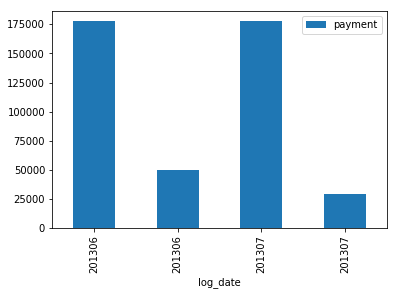

In [55]:
# plot
# .sum().plot(kind='hist', stacked=True, y='payment', x='log_date')
_payment_sum.groupby(['log_date', 'new/exists'], as_index=False).sum().plot(kind='bar', x='log_date', y='payment', stacked=True)

In [69]:
_payment_sum_pivot = pd.pivot_table(_payment_sum, values='payment', index='log_date', columns='new/exists', aggfunc='sum')

In [70]:
_payment_sum_pivot

new/exists,exists,new
log_date,,
201306,177886.0,49837.0
201307,177886.0,29199.0


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


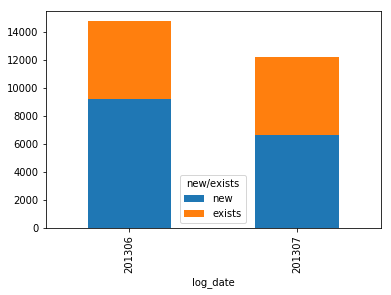

In [63]:
pd.crosstab(_payment_sum['log_date'], _payment_sum['new/exists']).plot(kind='bar', y=['new', 'exists'], stacked=True)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


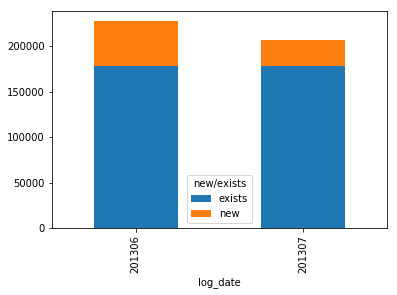

In [73]:
_payment_sum_pivot.plot(kind='bar', y=['exists', 'new'], stacked=True)

In [74]:
# 新規ユーザーだけ、先月と今月の支払いを見比べたい。んで、柱の幅を1,000円なヒストグラム
_new_user = _payment_sum[_payment_sum['new/exists'] == 'new']

In [75]:
_new_user.head()

,log_date,user_id,install_date,payment,new/exists
5598,201306,13491,201306,0.0,new
5599,201306,13492,201306,0.0,new
5600,201306,13493,201306,0.0,new
5601,201306,13494,201306,0.0,new
5602,201306,13495,201306,0.0,new


In [82]:
# paymentがfloatなので、intにする
_new_user['payment'] = _new_user['payment'].astype('int64')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
_new_user.head()

,log_date,user_id,install_date,payment,new/exists
5598,201306,13491,201306,0,new
5599,201306,13492,201306,0,new
5600,201306,13493,201306,0,new
5601,201306,13494,201306,0,new
5602,201306,13495,201306,0,new


In [90]:
_new_user['from'] = _new_user['payment'] // 1000 * 1000

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
_new_user['to'] = (_new_user['payment'] // 1000 + 1) * 1000 - 1

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
_new_user.head()

,log_date,user_id,install_date,payment,new/exists,from,to
5598,201306,13491,201306,0,new,0,999
5599,201306,13492,201306,0,new,0,999
5600,201306,13493,201306,0,new,0,999
5601,201306,13494,201306,0,new,0,999
5602,201306,13495,201306,0,new,0,999


In [117]:
_new_user.groupby(['log_date', 'from', 'to'], as_index=False)[['user_id']].count()

,log_date,from,to,user_id
0,201306,0,999,9198
1,201306,1000,1999,6
2,201306,2000,2999,1
3,201306,3000,3999,1
4,201306,5000,5999,1
5,201306,6000,6999,1
6,201306,12000,12999,1
7,201307,0,999,6626
8,201307,1000,1999,2
9,201307,2000,2999,1


In [118]:
_new_user_count = _new_user.groupby(['log_date', 'from', 'to'], as_index=False)[['user_id']].count()

In [ ]:
# _payment_sum_pivot = pd.pivot_table(_payment_sum, values='payment', index='log_date', columns='new/exists', aggfunc='sum')

In [122]:
_pivot_new_user_count = pd.pivot_table(_new_user_count, values='user_id', index='from', columns='log_date', fill_value=0)

In [124]:
_pivot_new_user_count.head()

log_date,201306,201307
from,,
0,9198,6626
1000,6,2
2000,1,1
3000,1,0
4000,0,1


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


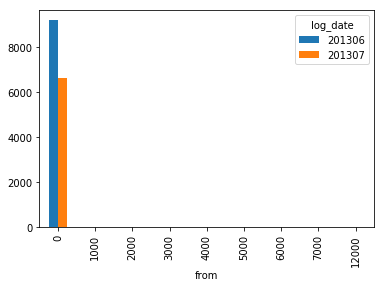

In [123]:
_pivot_new_user_count.plot(kind='bar')